<a href="https://colab.research.google.com/github/kkiprono4/KNN-and-Naive-Bayes-Classifier/blob/main/spambase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Question
## Specifying the Data Analytic Question
Predict whether an e-mail is spam (1) or not (0)

## Defining the Metric for Success
To be able to create a model using the Naive Bayes Classifier that can predict whether an email is spam or not.

## Understanding the context
Our dataset contains very many numerical columns and the target column has been named as '1'. The target variable has two classes which are;

1 - email is spam

0 - email is not spam.

## Recording the Experimental Design
* Import the relevant libraries
* Loading the dataset
* Exploratory Data Analysis
* Visualization
* Modelling: Naive Bayes Classifier: GaussianNB
* Optimizing techniques for Gaussian Naive Bayes Classifier
* Recommendations

## Data Relevance
* The collection of spam e-mails came from the postmaster and individuals who had filed spam.
* The collection of non-spam e-mails came from filed work and personal e-mails.

In [20]:
#Numpy is a library for python that supports multidimensional arrays and matrices as well as mathematical functions
import numpy as np
#Pandas is Python library used for data manipulation and data analysis
import pandas as pd
#Matplotlib is a python library utilised in plotting and its numerical capabilities
import matplotlib.pyplot as plt
#Seaborn is a Python data visualisation library basrd on matplotlib.
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df = pd.read_csv('/content/spambase.data')

In [3]:
#previewing the first 5 records
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [4]:
# Loading the names files first so that we can use the column names in our dataset
with open("spambase.names") as f:
  print(f.read())

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [5]:
# Assigning column names
# 
df.columns = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','class']

df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


# Checking the data

In [6]:
#checking shape
df.shape

(4600, 58)

4600 records and 58 variables

In [7]:
# Previewing the bottom of our dataset
# 
df.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [8]:
# Checking the number of unique classes in each column
df.nunique()

word_freq_make                 142
word_freq_address              171
word_freq_all                  214
word_freq_3d                    43
word_freq_our                  255
word_freq_over                 141
word_freq_remove               173
word_freq_internet             170
word_freq_order                144
word_freq_mail                 245
word_freq_receive              113
word_freq_will                 316
word_freq_people               158
word_freq_report               133
word_freq_addresses            118
word_freq_free                 253
word_freq_business             197
word_freq_email                229
word_freq_you                  575
word_freq_credit               148
word_freq_your                 401
word_freq_font                  99
word_freq_000                  164
word_freq_money                143
word_freq_hp                   395
word_freq_hpl                  281
word_freq_george               240
word_freq_650                  200
word_freq_lab       

In [9]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [10]:
# checking summary information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4600 non-null   float64
 1   word_freq_address           4600 non-null   float64
 2   word_freq_all               4600 non-null   float64
 3   word_freq_3d                4600 non-null   float64
 4   word_freq_our               4600 non-null   float64
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4600 non-null   float64
 7   word_freq_internet          4600 non-null   float64
 8   word_freq_order             4600 non-null   float64
 9   word_freq_mail              4600 non-null   float64
 10  word_freq_receive           4600 non-null   float64
 11  word_freq_will              4600 non-null   float64
 12  word_freq_people            4600 non-null   float64
 13  word_freq_report            4600 

* The data has 4600 records and 58 variables
* We have no missing values

 # Tidying the Dataset

In [11]:
# Checking for Outliers
#
# Checking for outliers using the Inter Quantile Range(IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
new_df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(new_df.shape)

# Printing the shape of our old dataset
print(df.shape)

(176, 58)
(4600, 58)


Removing the outliers from our dataset would completely make the dataset lose meaning as most records will be dropped. Due to this, we opt not to remove the outliers and instead work on the dataset with the outliers present.

In [12]:
# Identifying the Missing Data
#
df.isnull().sum().sum()

0

No missing values

In [13]:
# checking duplicates
#
df.duplicated().sum()

391

391 duplicates

In [14]:
#we shall drop duplicates
df = df.drop_duplicates()

In [15]:
# checking to confirm that duplicates have been dropped
#
df.duplicated().sum()

0

0 duplicates

# Exploratory Analysis

In [16]:
#Frequency table for the target column
# We can check for the frequency distribution in our dataset
df['class'].value_counts()

0    2531
1    1678
Name: class, dtype: int64

We have 2531 spam messages and 1678 are not spam

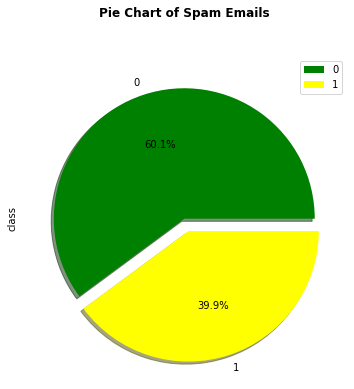

In [17]:
# Pie chart Pie Chart of Spam Emails
df['class'].value_counts().plot(kind='pie',shadow = True,explode=(0,0.1), colors=["green","yellow"], autopct='%1.1f%%')
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.legend(loc='upper right')
plt.title('Pie Chart of Spam Emails', y=1.1,weight="bold")
plt.show()

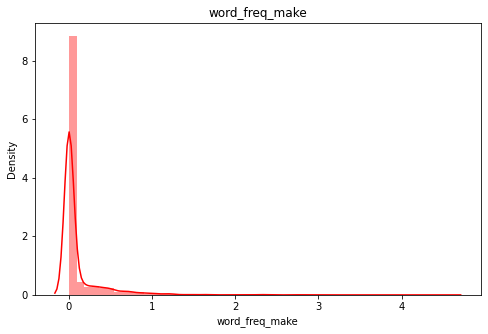

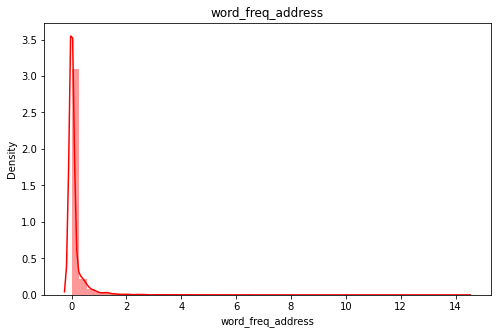

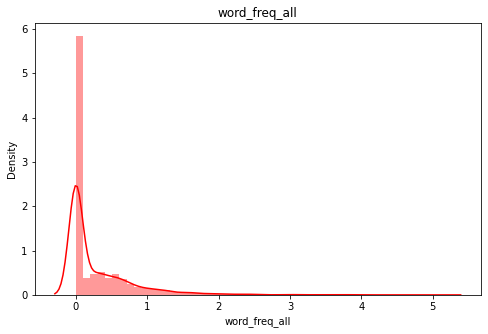

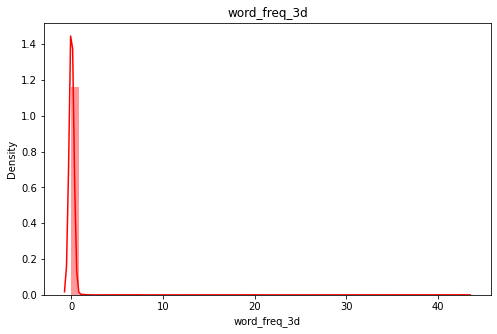

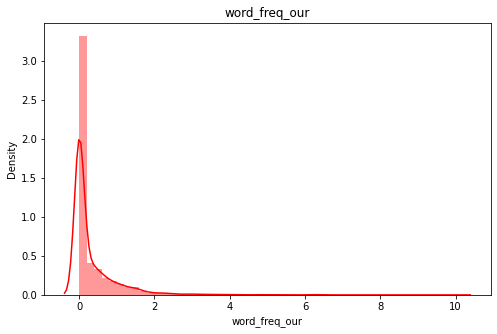

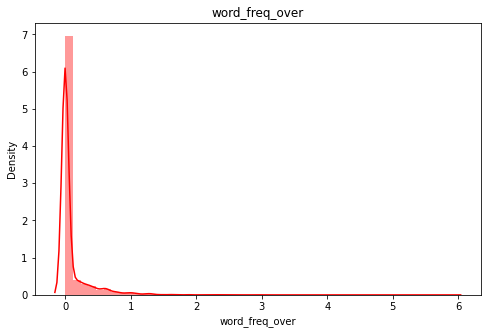

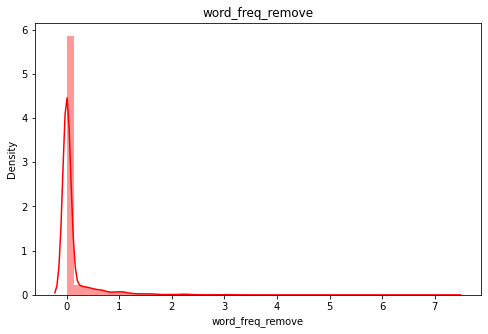

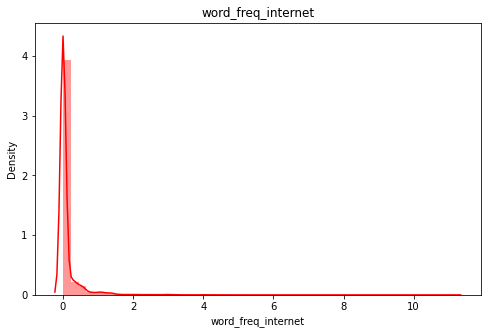

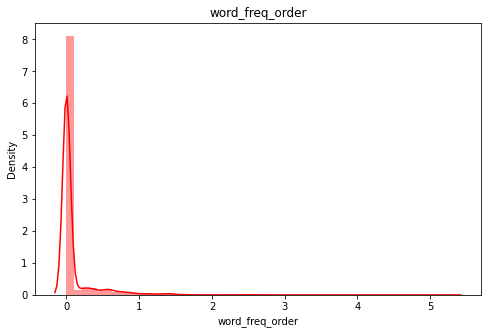

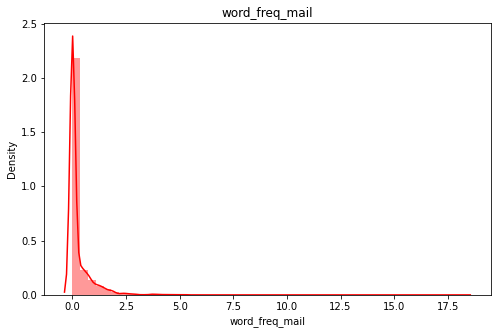

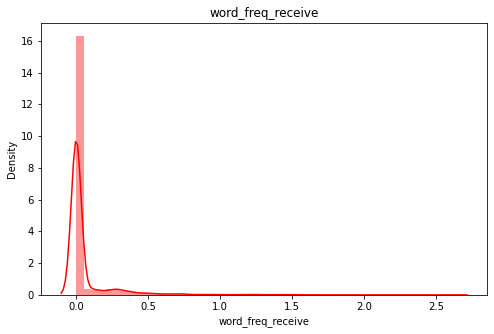

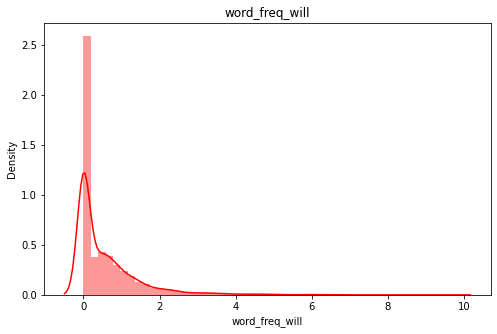

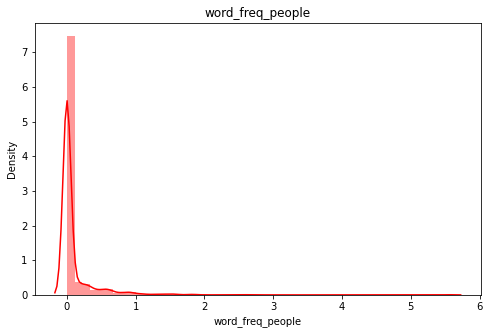

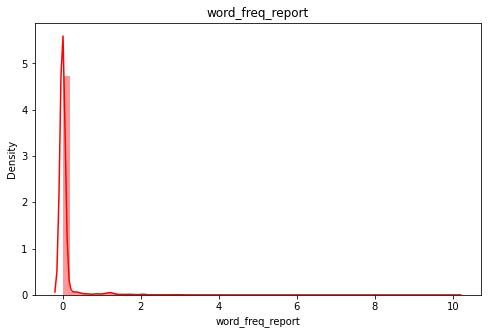

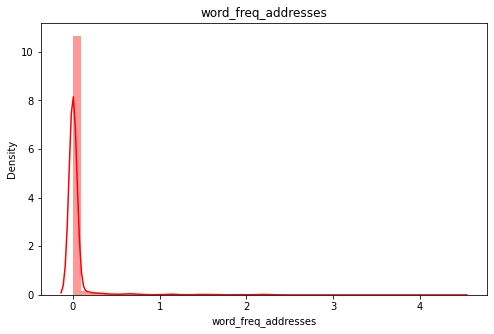

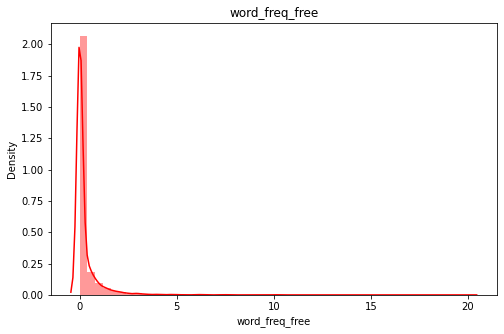

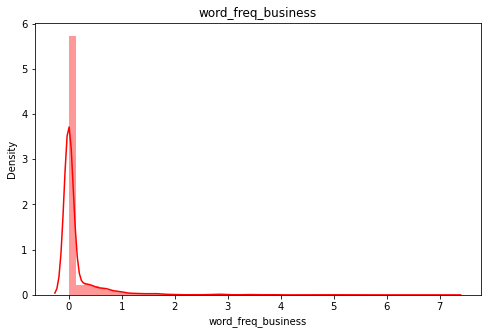

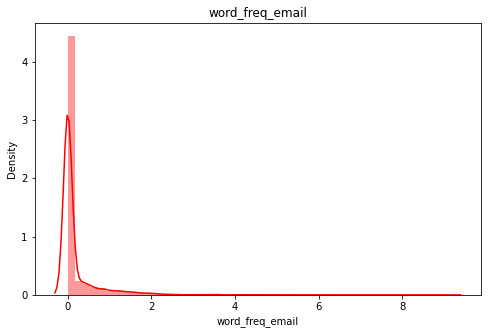

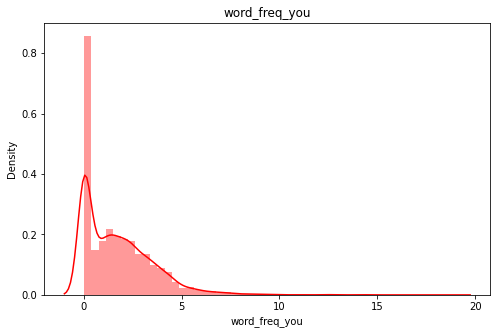

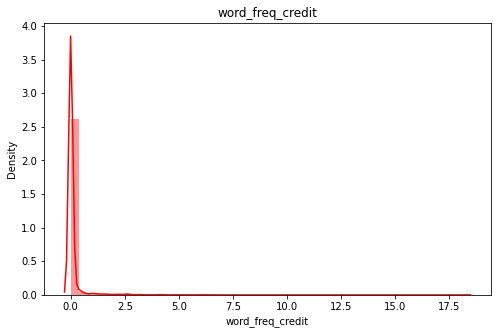

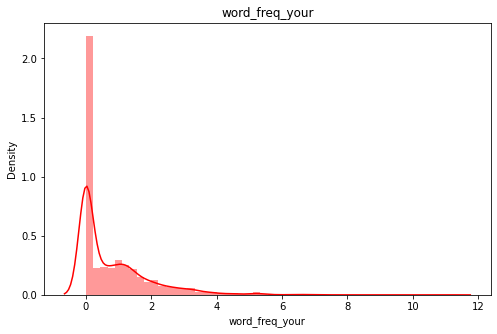

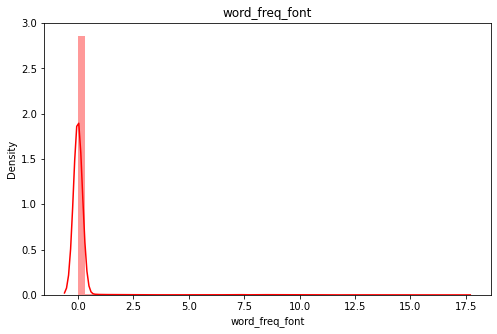

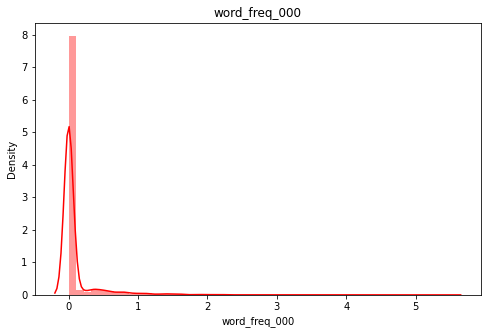

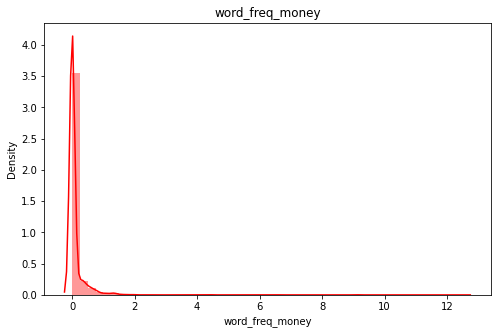

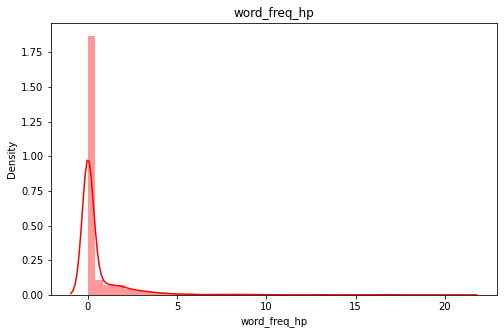

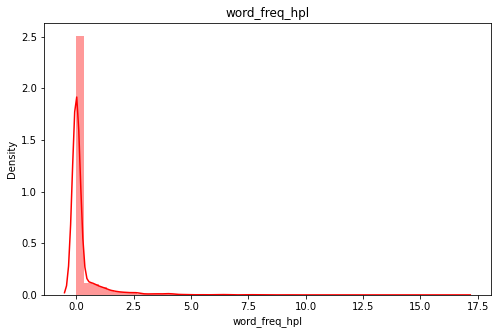

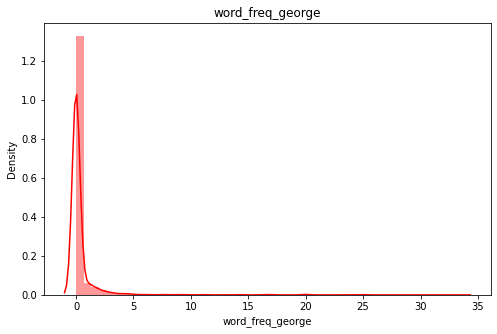

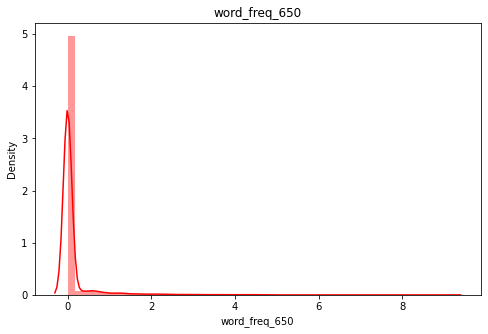

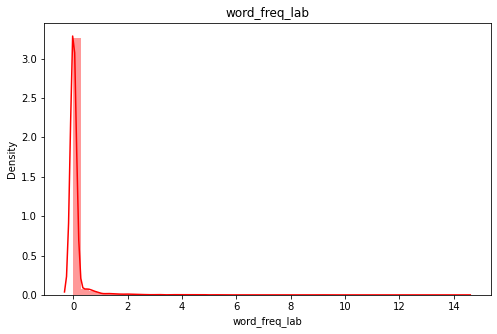

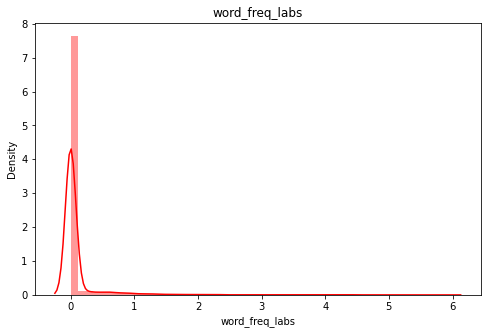

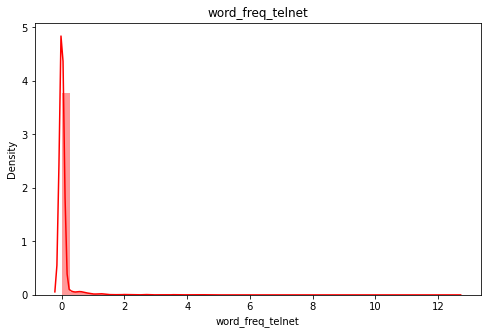

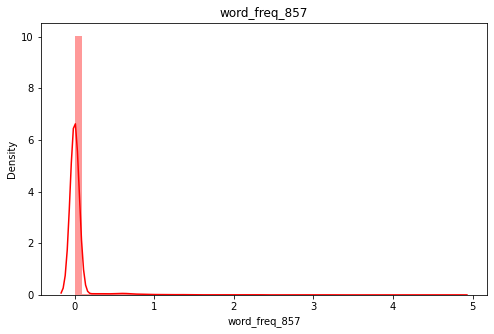

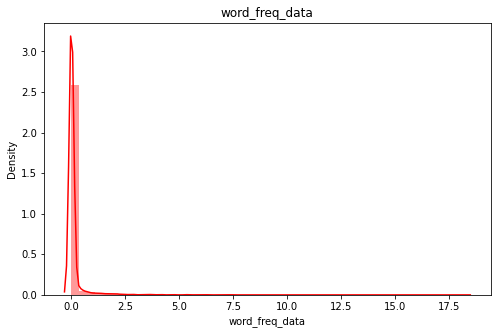

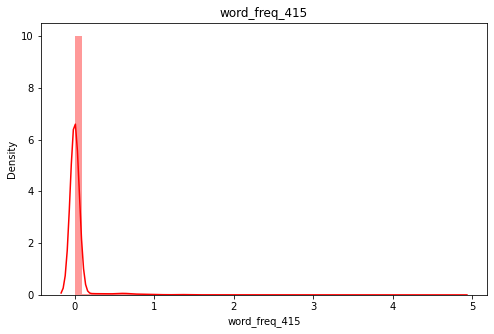

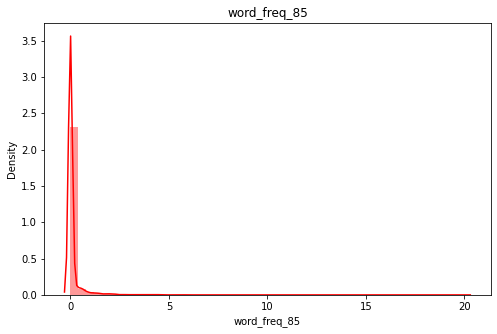

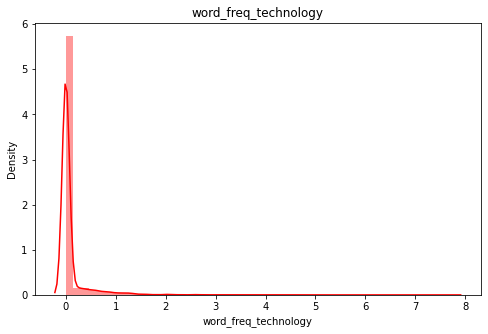

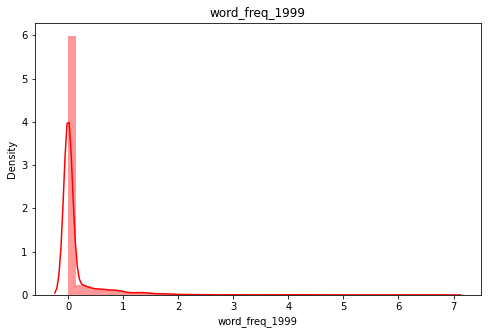

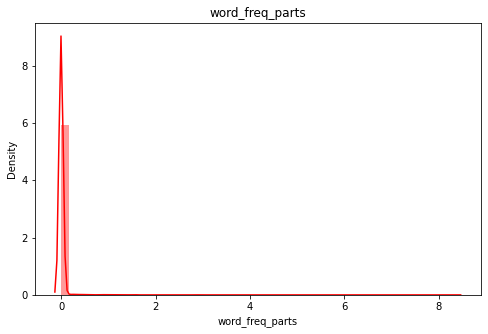

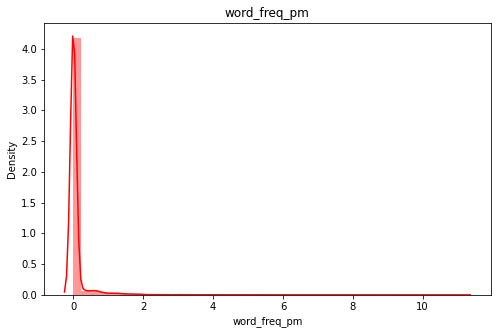

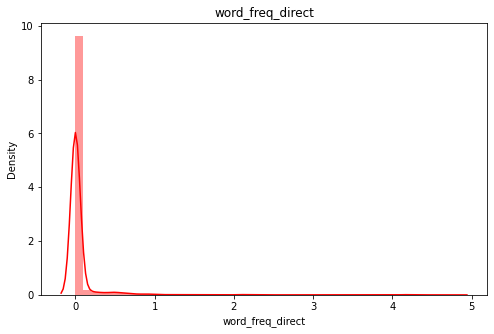

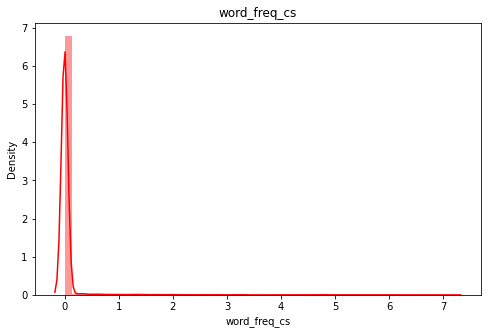

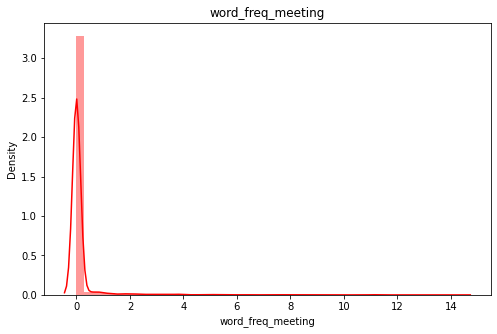

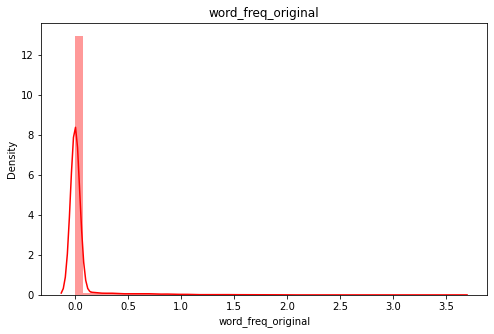

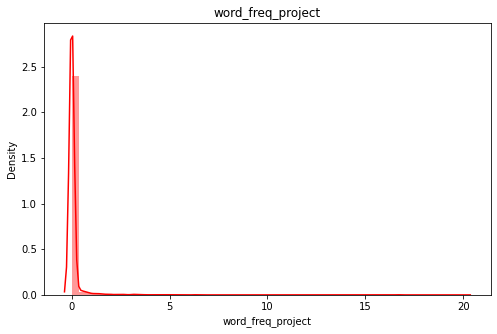

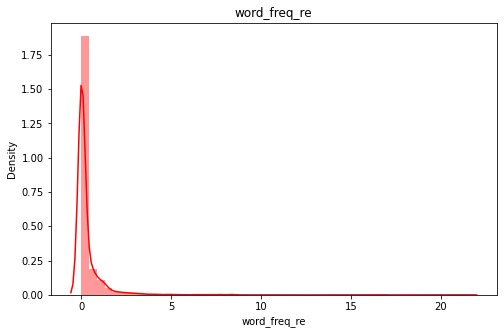

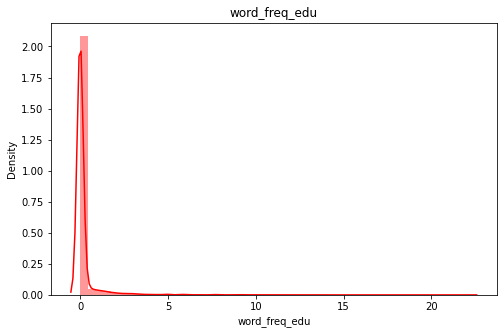

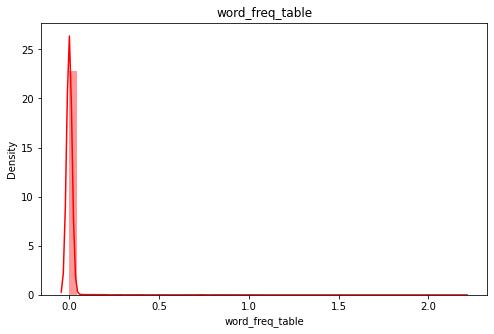

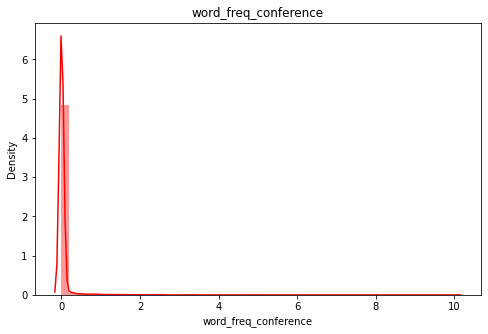

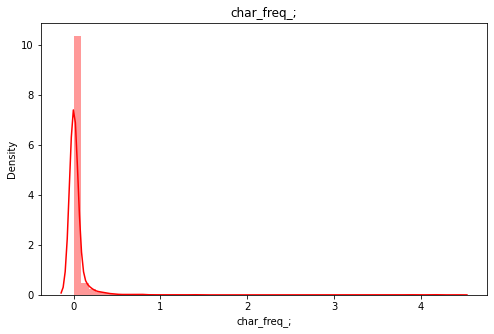

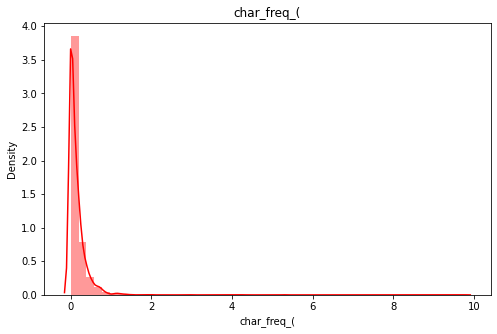

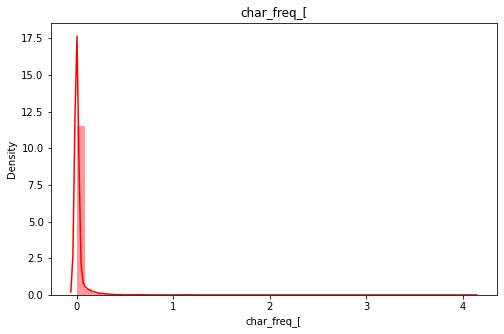

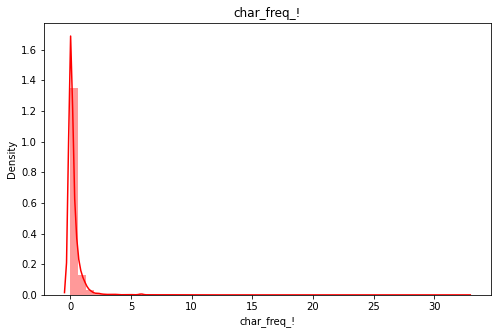

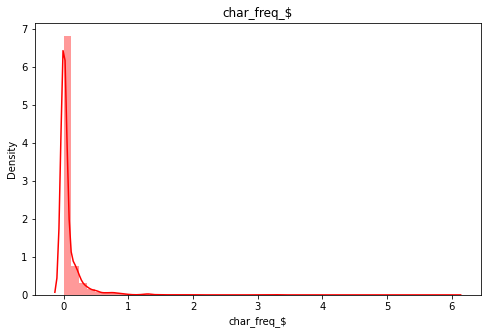

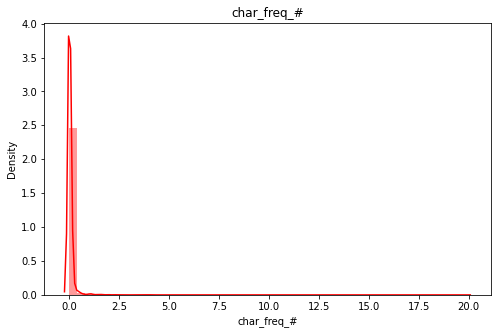

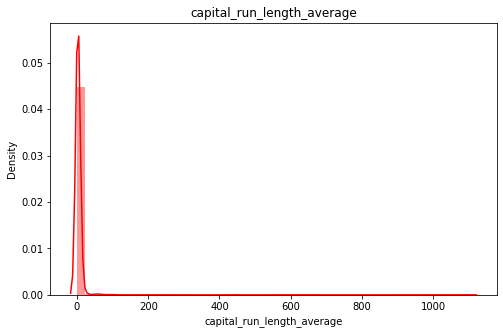

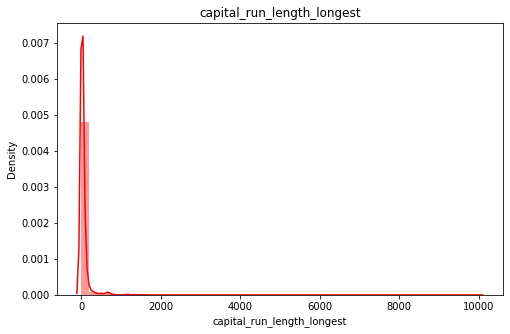

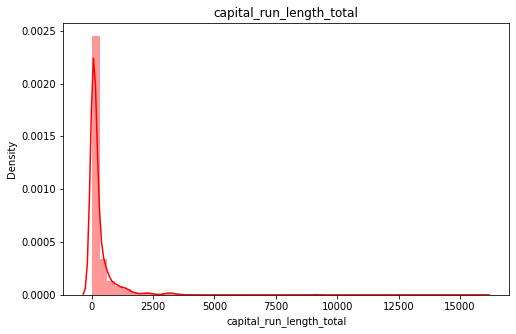

In [21]:
num_col=['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total']

# Plot histogram for numerical values

for i, j in enumerate(num_col):
  plt.figure(figsize=(8, 5))
  plt.title(j)
  sns.distplot(df[j], color='red', norm_hist=True)

In [22]:
# Checking the median, mode, varaince, skewness and kurtosis of our dataframe


for i in num_col:
  print('The median of', i, 'is:')
  print(df[i].median())
  print('The mode of', i, 'is:')
  print(df[i].mode())
  print('The variance of', i, 'is:')
  print(df[i].var())
  print('The skewness of', i, 'is:')
  print(df[i].skew())
  print('The kurtosis of', i, 'is:')
  print(df[i].kurt())
  print('                                    ')

The median of word_freq_make is:
0.0
The mode of word_freq_make is:
0    0.0
dtype: float64
The variance of word_freq_make is:
0.09002173523465819
The skewness of word_freq_make is:
5.869173727940259
The kurtosis of word_freq_make is:
54.339150808949654
                                    
The median of word_freq_address is:
0.0
The mode of word_freq_address is:
0    0.0
dtype: float64
The variance of word_freq_address is:
0.20633511225944084
The skewness of word_freq_address is:
13.469991513513268
The kurtosis of word_freq_address is:
306.8253529808409
                                    
The median of word_freq_all is:
0.0
The mode of word_freq_all is:
0    0.0
dtype: float64
The variance of word_freq_all is:
0.2659999451541911
The skewness of word_freq_all is:
2.9811627768769746
The kurtosis of word_freq_all is:
12.94299101097194
                                    
The median of word_freq_3d is:
0.0
The mode of word_freq_3d is:
0    0.0
dtype: float64
The variance of word_freq_3d i

In [23]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop the highly correlated features 
df.drop(df[to_drop], axis=1, inplace = True)

In [24]:
# checking if there are any correlated features
to_drop

['word_freq_415']

In [25]:
# checking if there are any columns dropped
df.shape

(4209, 57)

# Naive Bayes Classifier

Fitting the Naives Bayes Classifier: GausssianNB since the features are continuous

## 80-20 Train Test split

In [27]:

#splitting data into target and features
X=df.drop(["class"],1)
y=df[["class"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling 
# Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#import Linear Discriminant Analysismethod from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

from sklearn.naive_bayes import GaussianNB
# Introduce the Gaussian object and fit the train set
gnb = GaussianNB()

model = gnb.fit(X_train, y_train)

y_pred = model.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
#from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred)*100)

print('\n')

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))

89.78622327790974


[[475  20]
 [ 66 281]]


              precision    recall  f1-score   support

           0       0.88      0.96      0.92       495
           1       0.93      0.81      0.87       347

    accuracy                           0.90       842
   macro avg       0.91      0.88      0.89       842
weighted avg       0.90      0.90      0.90       842



With a 80% train , 20% test data, we get a 89.786 % accuracy.

## 70-30 Train and Test Set Split

In [28]:
#splitting data into target and features
X=df.drop(["class"],1)
y=df[["class"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature scaling 
# Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#import Linear Discriminant Analysismethod from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

from sklearn.naive_bayes import GaussianNB
# Introduce the Gaussian object and fit the train set
gnb = GaussianNB()

model = gnb.fit(X_train, y_train)

y_pred = model.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
#from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred)*100)

print('\n')

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))

89.54869358669833


[[706  31]
 [101 425]]


              precision    recall  f1-score   support

           0       0.87      0.96      0.91       737
           1       0.93      0.81      0.87       526

    accuracy                           0.90      1263
   macro avg       0.90      0.88      0.89      1263
weighted avg       0.90      0.90      0.89      1263



With a 70% train , 30% test data, we get a 89.5 % accuracy.

## 60-40 train and test split

In [29]:
#splitting data into target and features
X=df.drop(["class"],1)
y=df[["class"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Feature scaling 
# Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#import Linear Discriminant Analysismethod from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

from sklearn.naive_bayes import GaussianNB
# Introduce the Gaussian object and fit the train set
gnb = GaussianNB()

model = gnb.fit(X_train, y_train)

y_pred = model.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
#from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred)*100)

print('\n')

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))

89.60807600950119


[[943  51]
 [124 566]]


              precision    recall  f1-score   support

           0       0.88      0.95      0.92       994
           1       0.92      0.82      0.87       690

    accuracy                           0.90      1684
   macro avg       0.90      0.88      0.89      1684
weighted avg       0.90      0.90      0.90      1684



With a 60% train , 40% test data, we get a 89.6 % accuracy.

## Optimizing Naive Bayes
Improving the performance of the Naive Bayes classifier:

* Normalizing our data
* Remove Redundant/ correlated features
* Apply smoothing techniques

I applied the first technique in our models which was relevant in this scenario.

## Recommendation
* standardizing the features works greatly to improve the classifier.
* Using the linear discriminant analysis for dimension reduction yields beter results.
* Lastly increasing the test size in the spam dataset imporved  the accuracy of the model.

# Conclusion
The Gaussian NB is the best model since it yielded  the best Accuracy.
Optimizing the model is very essential:
* Scaling or normalizing the features
* Reducing the data dimensions
* Increasing the test size for a large dataset.